In [ ]:
#Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

In [1]:
#Sample Dataset

import pandas as pd

pizza = {'diameter': [5, 8, 11, 15, 17],
         'harga': [6, 10, 13, 18.5, 20]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,5,6.0
1,8,10.0
2,11,13.0
3,15,18.5
4,17,20.0


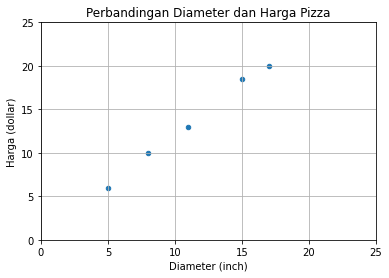

In [2]:
#Visualisasi Data

import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')  #mengatur judul
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)                                     #Untuk mengatur jangkauan sb x & sb y
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [3]:
#Simple Regression Model

#Penyesuaian Dataset

import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])      #target

print(f'X: {X}')
print(f'y: {y}')

X: [ 5  8 11 15 17]
y: [ 6.  10.  13.  18.5 20. ]


In [4]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [5]:
X

array([[ 5],
       [ 8],
       [11],
       [15],
       [17]], dtype=int64)

In [6]:
#Training Simple Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)                #akan ditraining dengan memanggil method fit

LinearRegression()

In [7]:
#Visualisai Simple Linear Regression Model

X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

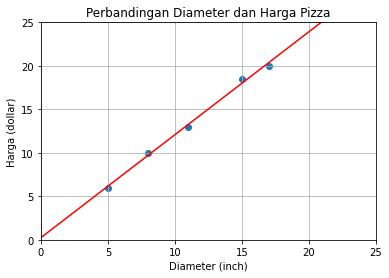

In [8]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')                        #Untuk melakukan plotting

plt.title('Perbandingan Diameter dan Harga Pizza')  #Judul
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [9]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 0.2520661157024815
slope: [1.18285124]


In [10]:
#Mencari Nilai Slope

print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')    #Mengembalikan kebentuk asal dengan menggunakan method flatten
print(f'y: {y}')

X:
[[ 5]
 [ 8]
 [11]
 [15]
 [17]]

X flatten: [ 5  8 11 15 17]

y: [ 6.  10.  13.  18.5 20. ]


In [11]:
#Variance

variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 24.2


In [12]:
#Covariance

np.cov(X.flatten(), y)  #Pemanggilan np.cov ini akan menghasilkan covariance matriks

array([[24.2  , 28.625],
       [28.625, 34.   ]])

In [16]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 28.625


In [17]:
#Slope

slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 1.1828512396694215


In [20]:
# Mencari Nilai Intercept

intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: 0.2520661157024797


In [21]:
# Prediksi Harga Pizza

diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [22]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([14.44628099, 23.90909091, 27.45764463])

In [23]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} prediksi harga: {hrg}')

Diameter: [12] prediksi harga: 14.446280991735536
Diameter: [20] prediksi harga: 23.909090909090907
Diameter: [23] prediksi harga: 27.457644628099175


In [25]:
#Evaluasi Simple Linear Regression 

# Training & Testing Dataset

X_train = np.array([5, 8, 11, 15, 17]).reshape(-1, 1)
y_train = np.array([6, 10, 13, 18.5, 20])

X_test = np.array([5, 8, 11, 15, 17]).reshape(-1, 1)
y_test = np.array([6, 10, 13, 18.5, 20])

In [26]:
# Training Simple Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared

from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.9958563745746233


In [28]:
# Mencari nilai R-squared

ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 0.56353305785124


In [29]:
# SStot

mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 136.0


In [30]:
# R Squared

r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.9958563745746233
